In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# parallel rectangles
def F12_parallel_rectanges(X, Y):
    F1 = np.log(np.sqrt((1 + X**2) * (1 + Y**2) / (1 + X**2 + Y**2)))
    F2 = X * np.sqrt(1 + Y**2) * np.arctan(X / np.sqrt(1 + Y**2))
    F3 = Y * np.sqrt(1 + X**2) * np.arctan(Y / np.sqrt(1 + X**2))
    F4 = X * np.arctan(X)
    F5 = Y * np.arctan(Y)
    F12 = 2 / (np.pi * X * Y) * (F1 + F2 + F3 - F4 - F5)
    print('Parallel: X =', X, ', Y =', Y, ', F12 =', F12)
    return F12

(0.01, 1.0)

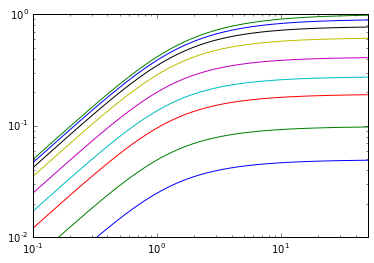

In [3]:
Yall = np.logspace(-1, 2)
for X in [0.1, 0.2, 0.4, 0.6, 1, 2, 4, 10, 1e6]:
    F12_all = []
    for Y in Yall:
        F12_all.append(F12_parallel_rectanges(X, Y))
    plt.loglog(Yall, F12_all, '-')
plt.xlim(0.1, 50)
plt.ylim(0.01, 1.0)

In [56]:
# perpendicular rectangles
def F12_perpendicular_rectanges(H, W):
    F1 = W * np.arctan(1/W)
    F2 = H * np.arctan(1/H)
    F3 = np.sqrt(H**2 + W**2) * np.arctan(1 / np.sqrt(H**2 + W**2))
    A = (1 + W**2) * (1 + H**2) / (1 + W**2 + H**2)
    B = (W**2 * (1 + W**2 + H**2) / (1 + W**2) / (W**2 + H**2))**(W**2)
    C = (H**2 * (1 + H**2 + W**2) / (1 + H**2) / (H**2 + W**2))**(H**2)
    F4 = 1/4*np.log(A*B*C)
    F12 = 1 / (np.pi * W) * (F1 + F2 - F3 + F4)
    print('Perpendicular: H =', H, ', W =', W, ', F12 =', F12)
    return F12

(0, 0.5)

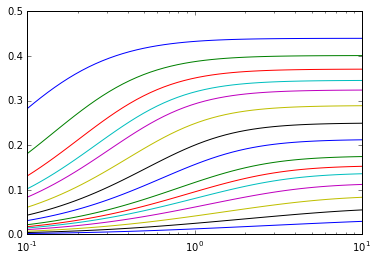

In [5]:
Hall = np.logspace(-1, 1)
for W in [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1, 1.4, 2, 2.5, 3, 4, 6, 10, 20]:
    F12_all = []
    for H in Hall:
        F12_all.append(F12_perpendicular_rectanges(H, W))
    plt.plot(Hall, F12_all, '-')
plt.xlim(0.1, 10)
plt.xscale('log')
plt.ylim(0, 0.5)

In [66]:
# exercise 4.5
sigma = 5.67e-8

L = 5.0 # [m]
W = 2.0 # [m]
H = 1.0 # [m]

A_side1 = H*L # 1x5
A_side2 = H*W # 1x2
A_top = L*W
A_bottom = L*W

T_side1 = 1000 # [K]
T_side2 = 800 # [K]
T_bottom = 600 # [K]

# at first, calculate the top surface temperature
F_bottom_to_top = F12_parallel_rectanges(L/H, W/H)
F_side1_to_top = F12_perpendicular_rectanges(W/L, H/L) # from 1x5 to 2x5
F_side2_to_top = F12_perpendicular_rectanges(L/W, H/W) # from 1x2 to 2x5
#print(F_bottom_to_top + 2*F_side1_to_top*A_side1/A_top + 2*F_side2_to_top*A_side2/A_top) # must be 1.0

E_to_top = 2 * sigma * T_side1**4 * A_side1 * F_side1_to_top
E_to_top += 2 * sigma * T_side2**4 * A_side2 * F_side2_to_top
E_to_top += sigma * (T_bottom**4 * A_bottom * F_bottom_to_top)
T_top = (E_to_top / (A_top * sigma))**0.25
print('T_top =', T_top, 'K')

# Energy flow into bottom
#E_from_bottom = sigma * T_bottom**4 * A_bottom
E_to_bottom = 2 * sigma * (T_side1**4 - T_bottom**4) * A_side1 * F_side1_to_top
E_to_bottom += 2 * sigma * (T_side2**4 - T_bottom**4) * A_side2 * F_side2_to_top
E_to_bottom += sigma * (T_top**4 - T_bottom**4) * A_top * F_bottom_to_top
print('E_effective =', E_to_bottom*1e-3, 'kW')

Parallel: X = 5.0 , Y = 2.0 , F12 = 0.529930859518
Perpendicular: H = 0.4 , W = 0.2 , F12 = 0.342947185914
Perpendicular: H = 2.5 , W = 0.5 , F12 = 0.317804886419
T_top = 825.198047504 K
E_effective = 195.101944221 kW


In [68]:
2 * sigma * (T_side1**4 - T_bottom**4) * A_side1 * F_side1_to_top * 1e-3

169.25019776132282

In [69]:
2 * sigma * (T_side2**4 - T_bottom**4) * A_side2 * F_side2_to_top * 1e-3

20.181881507155765

In [70]:
sigma * (T_top**4 - T_bottom**4) * A_top * F_bottom_to_top * 1e-3

100.38590458708265